In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, GlobalAveragePooling1D, Dense, Dropout, BatchNormalization, concatenate, LeakyReLU, Add
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GroupShuffleSplit
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# === Load Paths ===
base_path = '/content/drive/MyDrive/Hammering_Test/s02'
impact_csv = os.path.join(base_path, 'impact_features_good_bad.csv')
vibration_csv = os.path.join(base_path, 'vibration_features_good_bad.csv')

Mounted at /content/drive


In [ ]:
# === Load Data ===
impact_df = pd.read_csv(impact_csv)
vibration_df = pd.read_csv(vibration_csv)

In [ ]:
# === Extract group (e.g., 'sam100') ===
impact_df['group'] = impact_df['filename'].apply(lambda x: x.split('_')[0])
vibration_df['group'] = vibration_df['filename'].apply(lambda x: x.split('_')[0])

In [ ]:
drop_cols = ['filename', 'label', 'temporal_centroid', 'duration', 'flatness', 'crest_factor', 'kurtosis', 'mfcc_1', 'mfcc_9', 'mfcc_11', 'mfcc_12', 'mfcc_13',
             'chroma_1', 'chroma_2', 'chroma_3', 'chroma_4', 'chroma_5', 'chroma_6', 'chroma_7', 'chroma_8', 'chroma_9', 'chroma_10', 'chroma_11', 'chroma_12',
             'fft_coeff_1', 'fft_coeff_2', 'fft_coeff_3', 'fft_coeff_4', 'fft_coeff_5', 'fft_coeff_6', 'fft_coeff_7', 'group']

In [ ]:
# === Merge impact and vibration on group and label ===
merged_df = impact_df[['group', 'label']].copy()
merged_df['impact_features'] = impact_df.drop(columns=drop_cols).values.tolist()
merged_df['vibration_features'] = vibration_df.drop(columns=drop_cols).values.tolist()

In [ ]:
merged_df.tail(10)

,group,label,impact_features,vibration_features
6291,sam99,0,"[0.03759765625, 0.04000347, 3797.785386749219,...","[0.030859375, 0.0109991245, 2217.324658721918,..."
6292,sam99,0,"[0.03271484375, 0.041275043, 3921.226439078929...","[0.0220703125, 0.007160661, 1202.6606077757594..."
6293,sam99,0,"[0.021484375, 0.047395505, 3487.2468118042643,...","[0.00751953125, 0.015250444, 1053.258893746405..."
6294,sam99,0,"[0.0185546875, 0.04172185, 3615.894779875516, ...","[0.0173828125, 0.012378501, 1486.6114939276465..."
6295,sam9,0,"[0.0458984375, 0.04494812, 3485.26296088264, 2...","[0.04794921875, 0.015926676, 1892.879824934743..."
6296,sam9,0,"[0.04150390625, 0.061301194, 3621.194717426046...","[0.0458984375, 0.020643884, 1959.043749502208,..."
6297,sam9,0,"[0.0390625, 0.06336721, 3824.687116644881, 233...","[0.06435546875, 0.012998454, 1918.710194608448..."
6298,sam9,0,"[0.044921875, 0.057576265, 3818.632407362776, ...","[0.04775390625, 0.017257348, 2010.280401369802..."
6299,sam9,0,"[0.04248046875, 0.04867662, 3489.6400490275346...","[0.06630859375, 0.015302531, 2243.957579810028..."
6300,sam9,0,"[0.0439453125, 0.058502458, 3426.8091185711774...","[0.065234375, 0.013596838, 2218.401320904625, ..."


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('group').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('group')):
  _plot_series(series, series_name, i)
  fig.legend(title='group', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['label']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'label'}, axis=1)
              .sort_values('label', ascending=True))
  xs = counted['label']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_3.sort_values('label', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('group')):
  _plot_series(series, series_name, i)
  fig.legend(title='group', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('label')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_4['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_5['group'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_5, x='index', y='group', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
# === Group-based Split ===
groups = merged_df['group'].values
gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
train_idx, test_idx = next(gss.split(merged_df, groups=groups))

train_df = merged_df.iloc[train_idx].reset_index(drop=True)
test_df = merged_df.iloc[test_idx].reset_index(drop=True)

In [ ]:
# === Separate features and labels ===
X1_train = np.array(train_df['impact_features'].tolist())
X2_train = np.array(train_df['vibration_features'].tolist())
y_train = train_df['label'].values

X1_test = np.array(test_df['impact_features'].tolist())
X2_test = np.array(test_df['vibration_features'].tolist())
y_test = test_df['label'].values

In [ ]:
# === Scale ===
scaler1 = StandardScaler()
scaler2 = StandardScaler()
X1_train = scaler1.fit_transform(X1_train)
X1_test = scaler1.transform(X1_test)
X2_train = scaler2.fit_transform(X2_train)
X2_test = scaler2.transform(X2_test)

In [ ]:
import joblib

# Save the scalers to .pkl files
joblib.dump(scaler1, '/content/drive/MyDrive/Hammering_Test/s02/scaler_impact.pkl')
joblib.dump(scaler2, '/content/drive/MyDrive/Hammering_Test/s02/scaler_vibration.pkl')

['/content/drive/MyDrive/Hammering_Test/s02/scaler_vibration.pkl']

In [ ]:
# === Reshape ===
X1_train = X1_train[..., np.newaxis]
X1_test = X1_test[..., np.newaxis]
X2_train = X2_train[..., np.newaxis]
X2_test = X2_test[..., np.newaxis]

In [ ]:
# === Residual Block with Channel Matching ===
def conv_block(x, filters):
    shortcut = x
    x = Conv1D(filters, 3, padding='same', kernel_regularizer=l2(0.001), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)
    x = LeakyReLU()(x)
    x = Conv1D(filters, 3, padding='same', kernel_regularizer=l2(0.001), kernel_initializer='he_normal')(x)
    x = BatchNormalization()(x)

    # Project shortcut if shape mismatch
    if shortcut.shape[-1] != x.shape[-1]:
        shortcut = Conv1D(filters, 1, padding='same', kernel_initializer='he_normal')(shortcut)
    x = Add()([shortcut, x])
    x = LeakyReLU()(x)
    x = MaxPooling1D(pool_size=2)(x)
    x = Dropout(0.3)(x)
    return x

In [ ]:
# === Impact Branch ===
input1 = Input(shape=X1_train.shape[1:], name='impact_input')
x1 = Conv1D(32, 3, padding='same', kernel_initializer='he_normal')(input1)
x1 = BatchNormalization()(x1)
x1 = LeakyReLU()(x1)
x1 = conv_block(x1, 64)
x1 = conv_block(x1, 128)
x1 = GlobalAveragePooling1D()(x1)

# === Vibration Branch ===
input2 = Input(shape=X2_train.shape[1:], name='vibration_input')
x2 = Conv1D(32, 3, padding='same', kernel_initializer='he_normal')(input2)
x2 = BatchNormalization()(x2)
x2 = LeakyReLU()(x2)
x2 = conv_block(x2, 64)
x2 = conv_block(x2, 128)
x2 = GlobalAveragePooling1D()(x2)

In [ ]:
# === Merge Branches ===
merged = concatenate([x1, x2])
fc = Dense(128, activation='relu', kernel_regularizer=l2(0.001), kernel_initializer='he_normal')(merged)
fc = Dropout(0.5)(fc)
fc = Dense(64, activation='relu', kernel_regularizer=l2(0.001), kernel_initializer='he_normal')(fc)
fc = Dropout(0.3)(fc)
output = Dense(1, activation='sigmoid')(fc)

model = Model(inputs=[input1, input2], outputs=output)

In [ ]:
# === Compile Model ===
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=5e-5),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ impact_input        │ (None, 20, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ vibration_input     │ (None, 20, 1)     │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d (Conv1D)     │ (None, 20, 32)    │        128 │ impact_input[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_7 (Conv1D)   │ (None, 20, 32)    │        128 │ vibration_input[… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalization │ (None, 20, 32)    │        128 │ conv1d[0][0]      │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 20, 32)    │        128 │ conv1d_7[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu         │ (None, 20, 32)    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_5       │ (None, 20, 32)    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_1 (Conv1D)   │ (None, 20, 64)    │      6,208 │ leaky_re_lu[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_8 (Conv1D)   │ (None, 20, 64)    │      6,208 │ leaky_re_lu_5[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 20, 64)    │        256 │ conv1d_1[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 20, 64)    │        256 │ conv1d_8[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_1       │ (None, 20, 64)    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_6       │ (None, 20, 64)    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_2 (Conv1D)   │ (None, 20, 64)    │     12,352 │ leaky_re_lu_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_9 (Conv1D)   │ (None, 20, 64)    │     12,352 │ leaky_re_lu_6[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_3 (Conv1D)   │ (None, 20, 64)    │      2,112 │ leaky_re_lu[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 20, 64)    │        256 │ conv1d_2[0][0]    │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv1d_10 (Conv1D)  │ (None, 20, 64)    │      2,112 │ leaky_re_lu_5[0]… │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 250,753 (979.50 KB)

 Trainable params: 249,089 (973.00 KB)

 Non-trainable params: 1,664 (6.50 KB)

In [ ]:
# === Callbacks ===
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True, verbose=1)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=6, min_lr=1e-7, verbose=1)

In [ ]:
# === Train Model ===
history = model.fit([X1_train, X2_train], y_train,
                    validation_data=([X1_test, X2_test], y_test),
                    epochs=400,
                    batch_size=64,
                    callbacks=[early_stop, reduce_lr],
                    verbose=1)

Epoch 1/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 77ms/step - accuracy: 0.5004 - loss: 3.4777 - val_accuracy: 0.7746 - val_loss: 2.4395 - learning_rate: 5.0000e-05
Epoch 2/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.5965 - loss: 2.8724 - val_accuracy: 0.7876 - val_loss: 2.4181 - learning_rate: 5.0000e-05
Epoch 3/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 47ms/step - accuracy: 0.6353 - loss: 2.6832 - val_accuracy: 0.7997 - val_loss: 2.3892 - learning_rate: 5.0000e-05
Epoch 4/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 7s 69ms/step - accuracy: 0.6827 - loss: 2.5712 - val_accuracy: 0.7981 - val_loss: 2.3714 - learning_rate: 5.0000e-05
Epoch 5/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 8s 41ms/step - accuracy: 0.7022 - loss: 2.5393 - val_accuracy: 0.8174 - val_loss: 2.3503 - learning_rate: 5.0000e-05
Epoch 6/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 5s 61ms/step - accuracy: 0.7400 - loss: 2.4470 - val_accuracy: 0.8223 - val_loss: 2.3275 - learning_rate: 5.0000e-05
Epoch 7/400
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - accuracy:

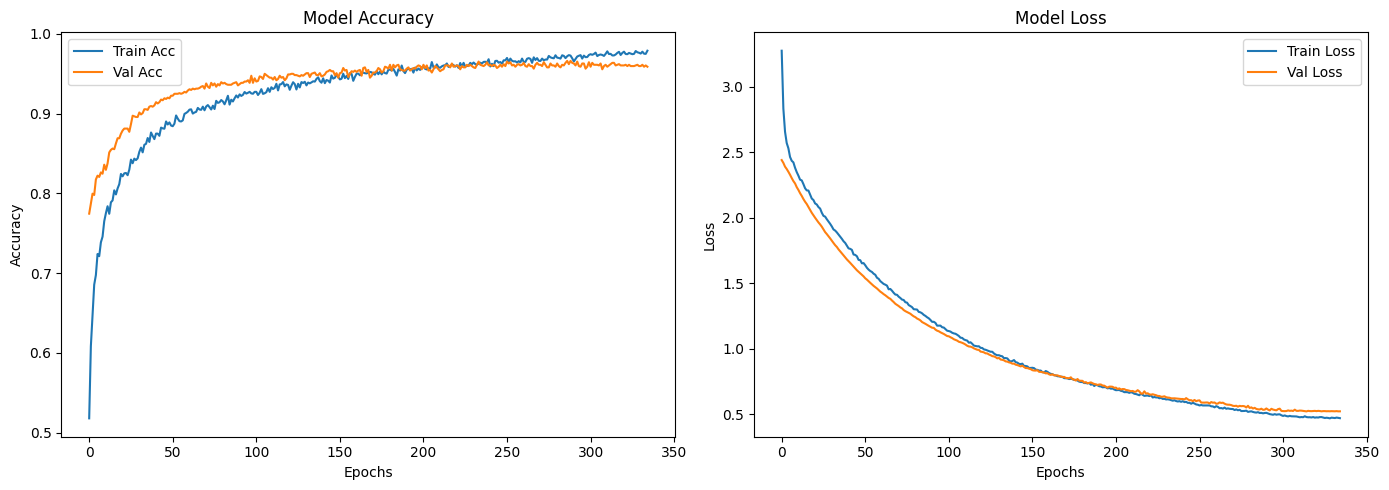

In [ ]:
# === Plot Accuracy and Loss ===
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# === Final Evaluation ===
y_pred_prob = model.predict([X1_test, X2_test])
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("\n=== Final Evaluation ===")
print(f"Accuracy       : {acc:.4f}")
print(f"Precision      : {prec:.4f}")
print(f"Recall         : {rec:.4f}")
print(f"F1 Score       : {f1:.4f}")
print("\n=== Classification Report ===")
print(classification_report(y_test, y_pred))

39/39 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step

=== Final Evaluation ===
Accuracy       : 0.9637
Precision      : 0.9647
Recall         : 0.9632
F1 Score       : 0.9640

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       613
           1       0.96      0.96      0.96       625

    accuracy                           0.96      1238
   macro avg       0.96      0.96      0.96      1238
weighted avg       0.96      0.96      0.96      1238



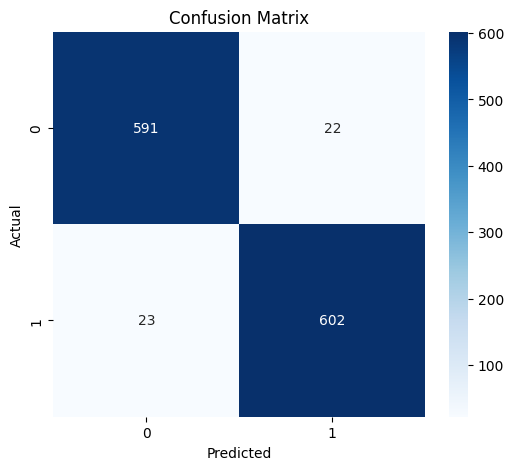

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Save the entire model
model.save('/content/drive/MyDrive/Hammering_Test/s02/1DCNN.h5')

In [ ]:
model.save('/content/drive/MyDrive/Hammering_Test/s02/1DCNN.keras')